In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PC\AppData\Local\Temp\ipykernel_8812\3978922422.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import ydata_profiling as pandas_profiling

In [6]:
carsales=pd.read_csv("D:\P EDA\car_sales.csv")

In [7]:
car_data=carsales.copy()

In [8]:
car_data.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [9]:
car_data.shape

(9576, 10)

In [10]:
car_data.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [13]:
car_data.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [14]:
car_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [ ]:
profile=pandas_profiling.ProfileReport(car_data)
profile.to_file(output_file='car_data_before_EDA.html')

In [15]:
car_data['price'].isnull().sum() 

0

In [16]:
car_data.duplicated().sum()

113

In [19]:
car_data.drop_duplicates(keep='first', inplace=True)

In [20]:
car_data.duplicated().sum()

0

In [21]:
car_data['car'].value_counts()

Volkswagen       927
Mercedes-Benz    885
BMW              684
Toyota           529
VAZ              488
                ... 
ZX                 1
Other-Retro        1
Mercury            1
Maserati           1
Buick              1
Name: car, Length: 87, dtype: int64

In [22]:
car_data['body'].value_counts()

sedan        3622
crossover    2007
hatch        1248
van          1038
other         829
vagon         719
Name: body, dtype: int64

In [23]:
car_data.sort_values(by=['price'],ascending=False)

,car,price,body,mileage,engV,engType,registration,year,model,drive
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
4325,Mercedes-Benz,300000.0,sedan,68,6.00,Petrol,yes,2011,S 600,NaN
5849,Mercedes-Benz,300000.0,other,37,5.00,Petrol,yes,2012,G 500,full
...,...,...,...,...,...,...,...,...,...,...
4107,VAZ,0.0,vagon,39,1.30,Gas,yes,1988,2104,rear
656,Audi,0.0,crossover,1,3.00,Diesel,yes,2016,A6 Allroad,full
5563,BMW,0.0,sedan,65,2.00,Petrol,yes,2012,320,rear
2229,Volkswagen,0.0,vagon,160,1.90,Diesel,yes,2003,Passat B5,front


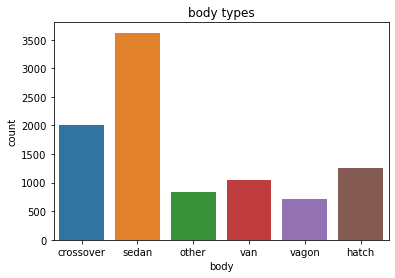

In [25]:
sns.countplot(x='body',data=car_data)
plt.title('body types')
plt.show()

In [26]:
car_data['engType'].value_counts()

Petrol    4341
Diesel    2950
Gas       1710
Other      462
Name: engType, dtype: int64

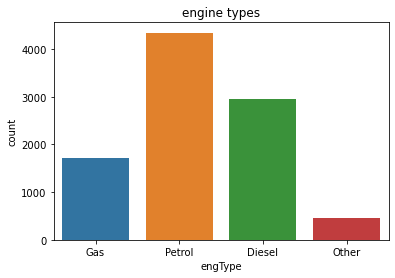

In [28]:
sns.countplot(x='engType',data=car_data)
plt.title('engine types')
plt.show()

<AxesSubplot:>

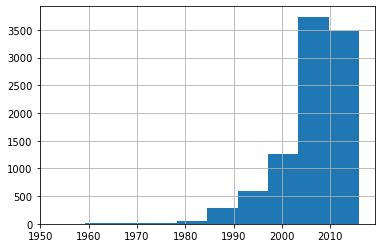

In [29]:
car_data['year'].hist()

In [30]:
car_data.corr()

,price,mileage,engV,year
price,1.000000,-0.312965,0.049641,0.375440
mileage,-0.312965,1.000000,0.048746,-0.489326
engV,0.049641,0.048746,1.000000,-0.043509
year,0.375440,-0.489326,-0.043509,1.000000


<AxesSubplot:>

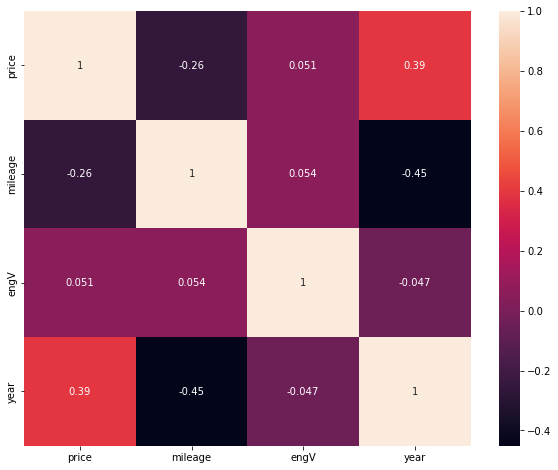

In [95]:
plt.subplots(figsize=(10,8))
sns.heatmap(car_data.corr(),annot=True)

In [32]:
car_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [33]:
car_data['drive'].isnull().sum()

510

In [34]:
car_data['drive'].mode()

0    front
Name: drive, dtype: object

In [35]:
car_data.loc[car_data['drive'].isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
37,Audi,2850.0,sedan,260,NaN,Other,no,1999,A6,NaN
44,BMW,39333.0,sedan,6,2.00,Petrol,yes,2016,520,NaN
52,Mercedes-Benz,31500.0,sedan,123,2.20,Diesel,yes,2011,E-Class,NaN
103,Volkswagen,10000.0,van,231,1.90,Diesel,yes,2005,T5 (Transporter) ïàññ.,NaN
...,...,...,...,...,...,...,...,...,...,...
9445,Nissan,5000.0,sedan,260,3.00,Gas,yes,2000,Maxima,NaN
9450,VAZ,750.0,sedan,123,1.20,Petrol,yes,1990,2105,NaN
9469,Renault,5650.0,hatch,175,99.99,Other,yes,2002,Laguna,NaN
9537,Volkswagen,11500.0,other,51,1.60,Petrol,yes,2013,Polo,NaN


In [36]:
car_data['drive'].fillna('front',inplace=True)

In [37]:
car_data['drive'].isnull().sum()

0

In [38]:
car_data['engV'].isnull().sum()

434

In [39]:
car_data['engV'].mode().loc[0]

2.0

In [40]:
eng_mode=car_data['engV'].mode().loc[0] 

In [41]:
car_data['engV'].fillna(eng_mode,inplace=True)

In [42]:
car_data['engV'].isnull().sum()

0

In [43]:
car_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [44]:
(car_data['price']<=0).value_counts()

False    9223
True      240
Name: price, dtype: int64

In [45]:
car_data[car_data['price']<=0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
92,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front


In [46]:
car_data.drop(car_data[car_data['price'] <= 0].index,inplace=True)

In [47]:
car_data[car_data['price']<=0]

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [48]:
car_data[car_data['mileage']<=0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
10,Nissan,20447.1540,crossover,0,1.2,Petrol,yes,2016,Qashqai,front
17,Mercedes-Benz,99999.0000,crossover,0,3.0,Petrol,yes,2016,GLE-Class,full
21,Nissan,26033.5530,crossover,0,1.6,Diesel,yes,2016,X-Trail,full
24,BMW,65099.0000,crossover,0,2.0,Diesel,yes,2016,X5,full
26,Mercedes-Benz,69999.0000,crossover,0,2.2,Diesel,yes,2016,GLE-Class,full
...,...,...,...,...,...,...,...,...,...,...
9234,Hyundai,12800.7750,hatch,0,1.4,Petrol,yes,2016,Solaris,front
9268,Subaru,37500.0000,crossover,0,2.0,Diesel,yes,2016,Forester,full
9382,Suzuki,15486.9000,hatch,0,1.2,Petrol,yes,2016,Swift,front
9483,Opel,20120.0000,sedan,0,1.6,Diesel,yes,2016,Astra J,front


In [49]:
a=car_data['mileage'].median()
a

130.0

In [50]:
car_data['mileage']=car_data['mileage'].replace(0, a)

In [51]:
car_data[car_data['mileage']<=0]

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [52]:
car_data['price']=car_data['price'].round(2)

In [53]:
car_data['price']

0       15500.0
1       20500.0
2       35000.0
3       17800.0
4       33000.0
         ...   
9571    14500.0
9572     2200.0
9573    18500.0
9574    16999.0
9575    22500.0
Name: price, Length: 9223, dtype: float64

In [ ]:
profile=pandas_profiling.ProfileReport(car_data)
profile.to_file(output_file='car_data_after_EDA.html')

# 1.Which type of cars are sold maximum?

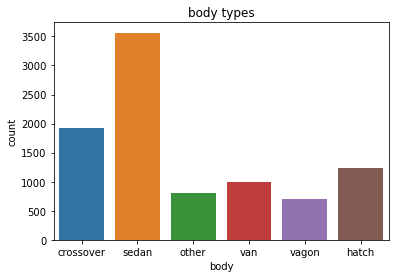

In [54]:
sns.countplot(x='body',data=car_data)
plt.title('body types')
plt.show()

# What is the co relation between price and mileage

In [55]:
car_data.corr()

,price,mileage,engV,year
price,1.000000,-0.255992,0.050786,0.391502
mileage,-0.255992,1.000000,0.053541,-0.451259
engV,0.050786,0.053541,1.000000,-0.046806
year,0.391502,-0.451259,-0.046806,1.000000


In [ ]:
 #As the 'mileage' of the car increases,the 'price' will slightly decreases

# How many cars are registered

In [56]:
car_data['registration'].value_counts()

yes    8669
no      554
Name: registration, dtype: int64

In [ ]:
# 8669 cars are registered

# Price distribution between registered and non-registered cars

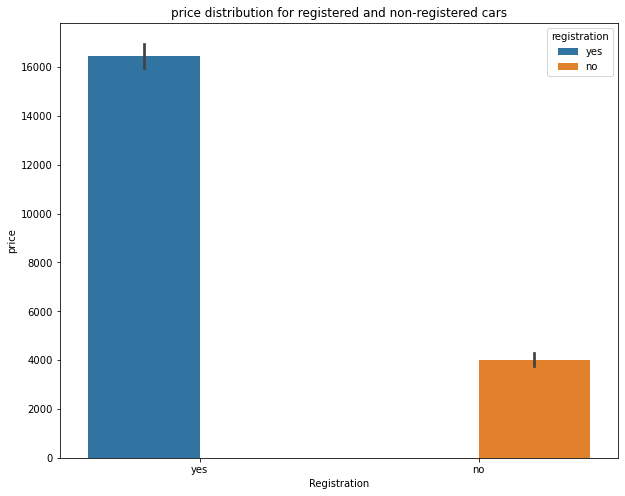

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(data=car_data,x='registration',y='price',hue='registration')
plt.xlabel('Registration')
plt.ylabel('price')
plt.title('price distribution for registered and non-registered cars')
plt.show()

# What is the car price distribution based on Engine value

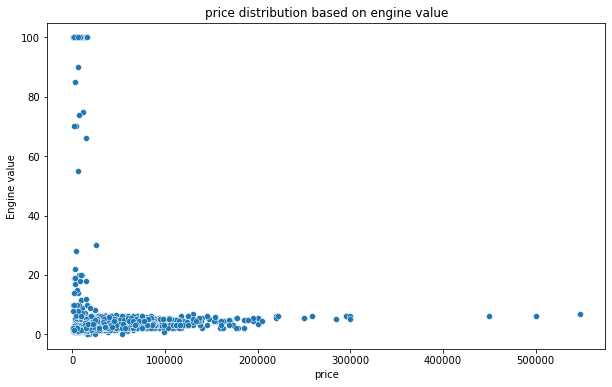

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=car_data,x='price',y='engV')
plt.xlabel('price')
plt.ylabel('Engine value')
plt.title('price distribution based on engine value')
plt.show()


# Which engine type of car users prefered maximum

In [89]:
a=car_data['body'].value_counts().head(1)
a

sedan    3564
Name: body, dtype: int64

# Establish corelation between all features using heatmap

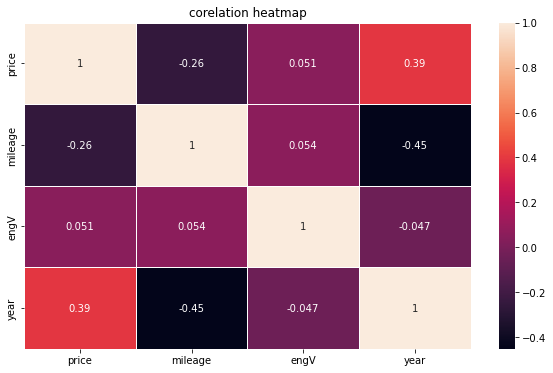

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(data=car_data.corr(),annot=True,linewidths=0.5)
plt.title('corelation heatmap')
plt.show()